In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df = pd.read_csv('ASOS.csv', index_col=0)
df.index.name=None
df.reset_index(inplace=True)
df.drop(df.index[129], inplace=True)

In [5]:
start = datetime.datetime.strptime("2006-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,129)]
df['index'] =date_list
df.set_index(['index'], inplace=True)
df.index.name=None

In [6]:
df.columns= ['GSO_LF','GSO_UR','CLT_LF', 'CLT_UR', 'RDU_LF',
             'RDU_UR', 'Harrisburg_LF', 'Harrisburg_UR', 'USA_LF',
             'USA_UR']

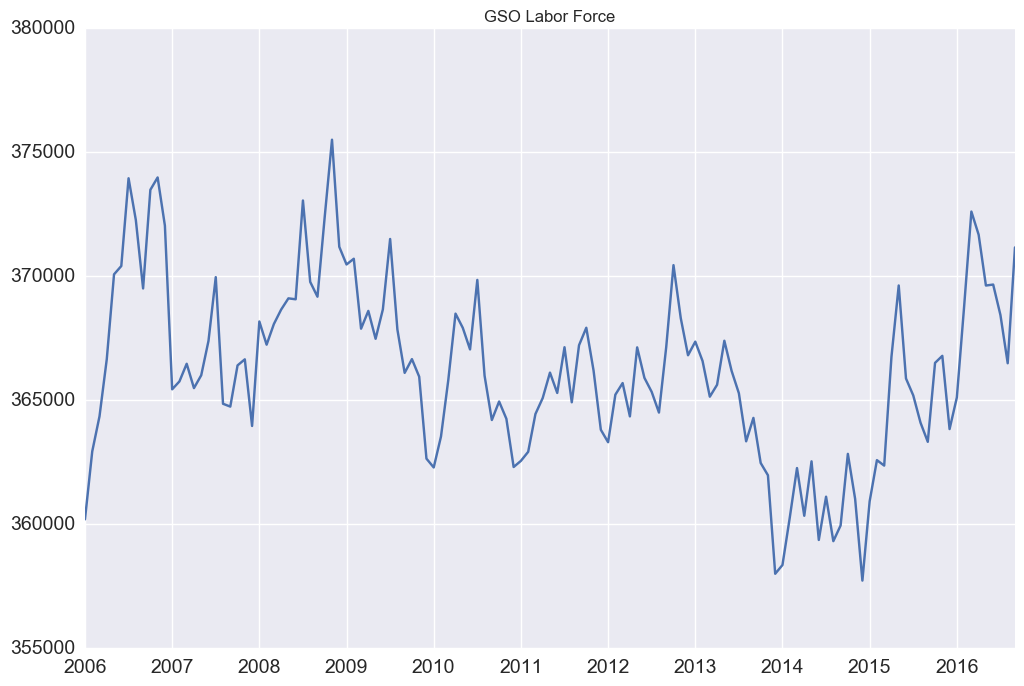

In [7]:
df.GSO_LF.plot(figsize=(12,8), title= 'GSO Labor Force', fontsize=14)
#plt.savefig('month_ridership.png', bbox_inches='tight')

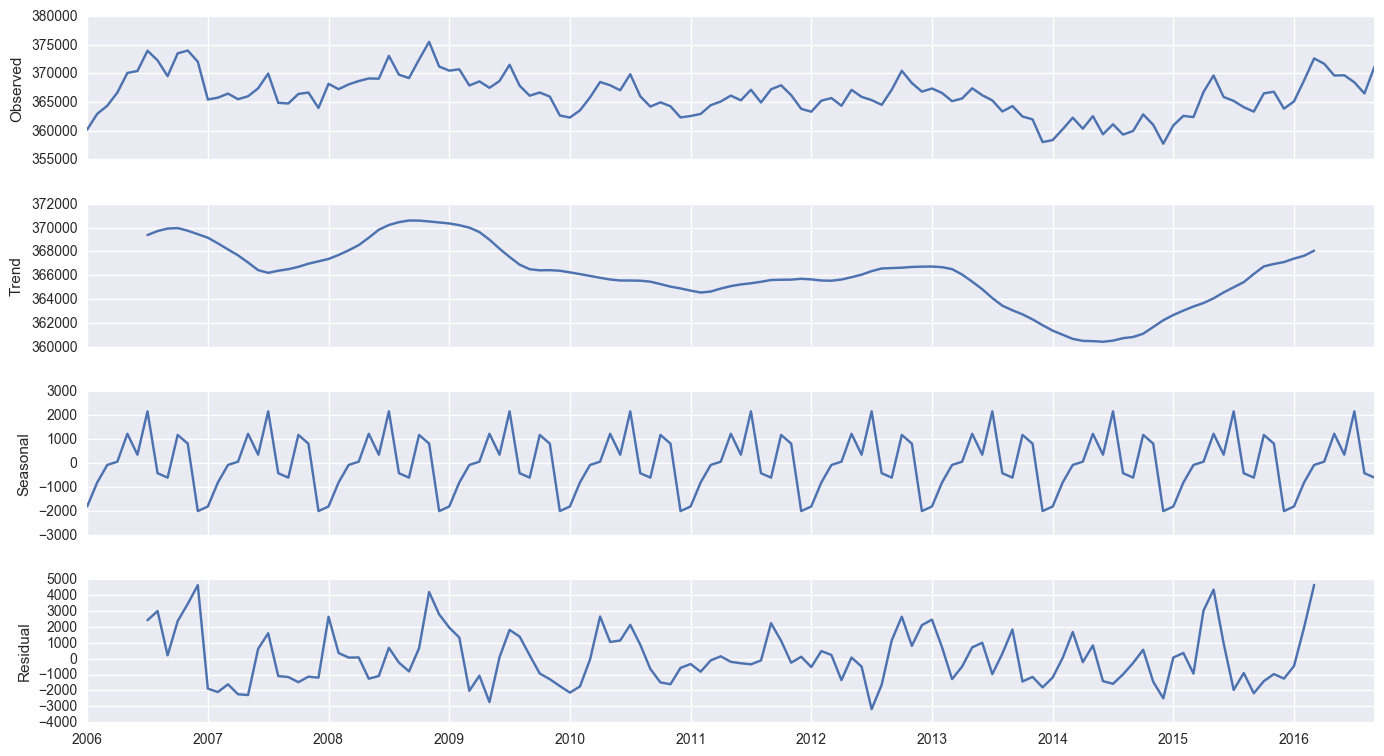

In [8]:
decomposition = seasonal_decompose(df.GSO_LF, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


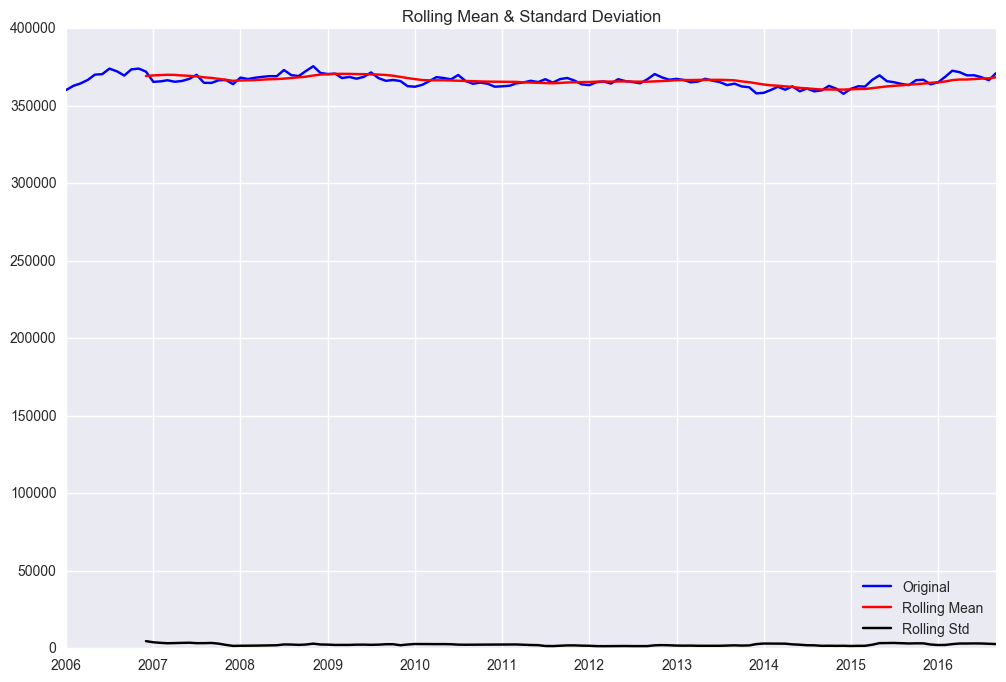

Results of Dickey-Fuller Test:
Test Statistic                  -2.388048
p-value                          0.145138
#Lags Used                      12.000000
Number of Observations Used    116.000000
Critical Value (5%)             -2.886797
Critical Value (1%)             -3.488022
Critical Value (10%)            -2.580241
dtype: float64


In [10]:
test_stationarity(df.GSO_LF)

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


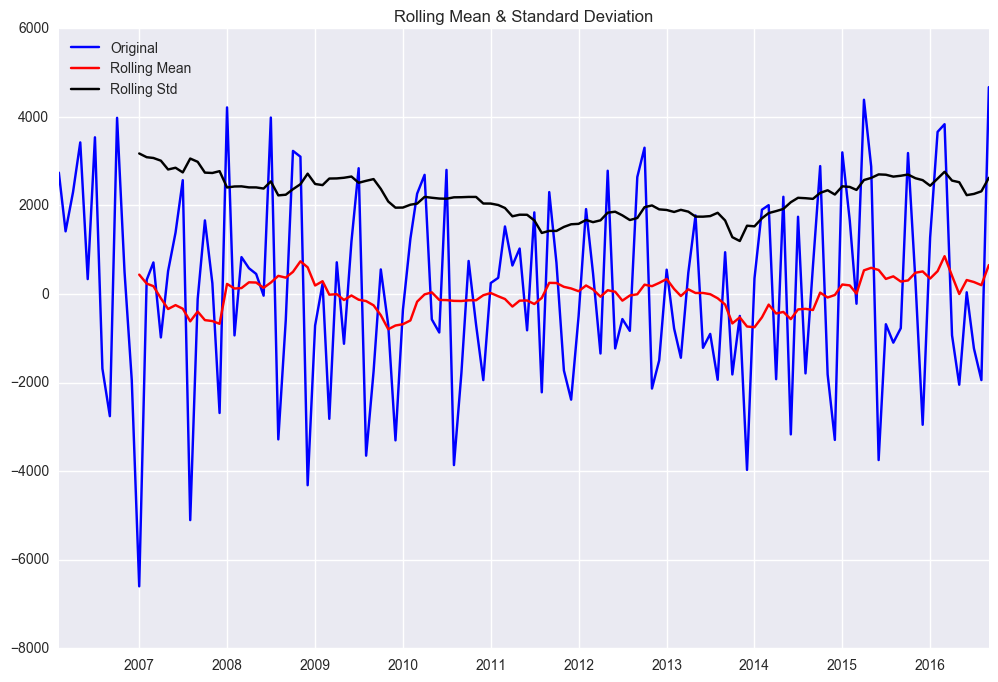

Results of Dickey-Fuller Test:
Test Statistic                  -2.752734
p-value                          0.065349
#Lags Used                      11.000000
Number of Observations Used    116.000000
Critical Value (5%)             -2.886797
Critical Value (1%)             -3.488022
Critical Value (10%)            -2.580241
dtype: float64


In [11]:
df['first_difference'] = df.GSO_LF - df.GSO_LF.shift(1)  
test_stationarity(df.first_difference.dropna(inplace=False))

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


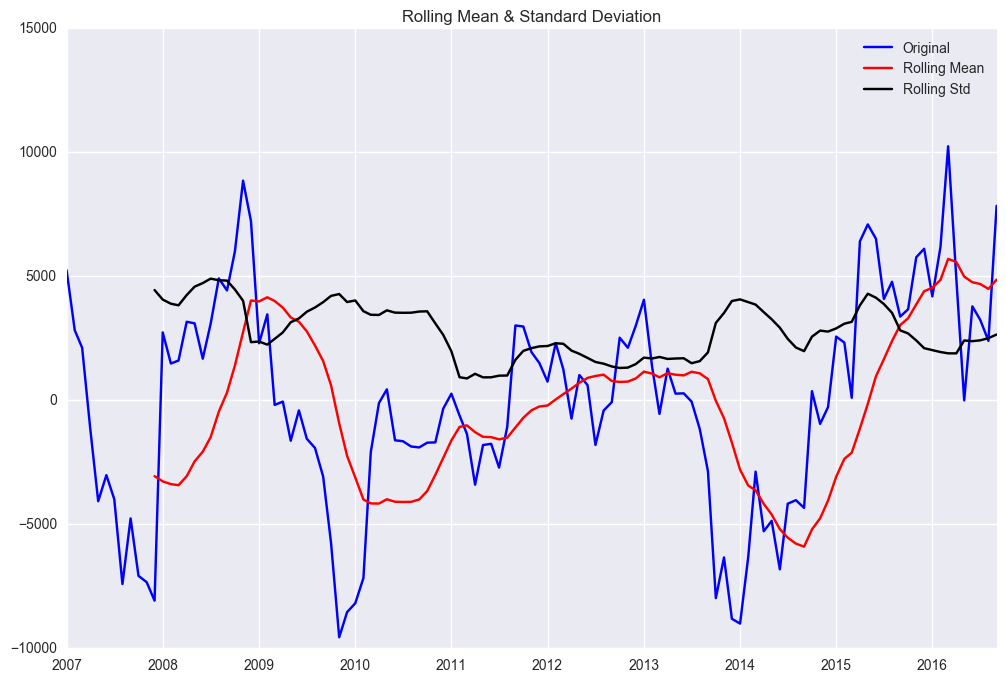

Results of Dickey-Fuller Test:
Test Statistic                  -1.959265
p-value                          0.304715
#Lags Used                      12.000000
Number of Observations Used    104.000000
Critical Value (5%)             -2.889758
Critical Value (1%)             -3.494850
Critical Value (10%)            -2.581822
dtype: float64


In [12]:
df['seasonal_difference'] = df.GSO_LF - df.GSO_LF.shift(12)  
test_stationarity(df.seasonal_difference.dropna(inplace=False))

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


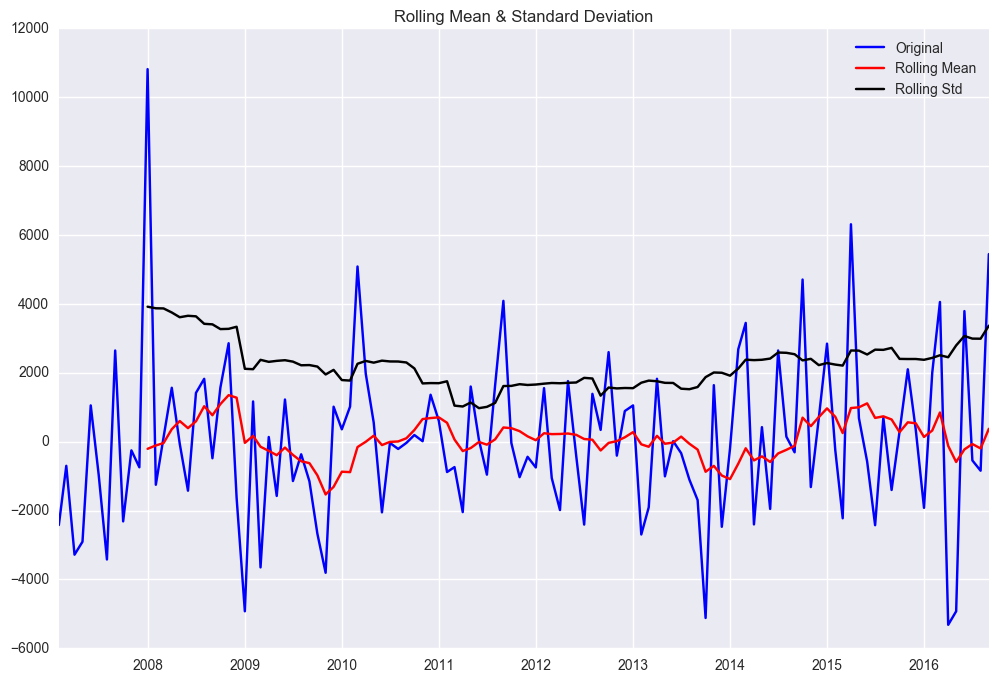

Results of Dickey-Fuller Test:
Test Statistic                  -4.391135
p-value                          0.000308
#Lags Used                      11.000000
Number of Observations Used    104.000000
Critical Value (5%)             -2.889758
Critical Value (1%)             -3.494850
Critical Value (10%)            -2.581822
dtype: float64


In [13]:
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(12)  
test_stationarity(df.seasonal_first_difference.dropna(inplace=False))

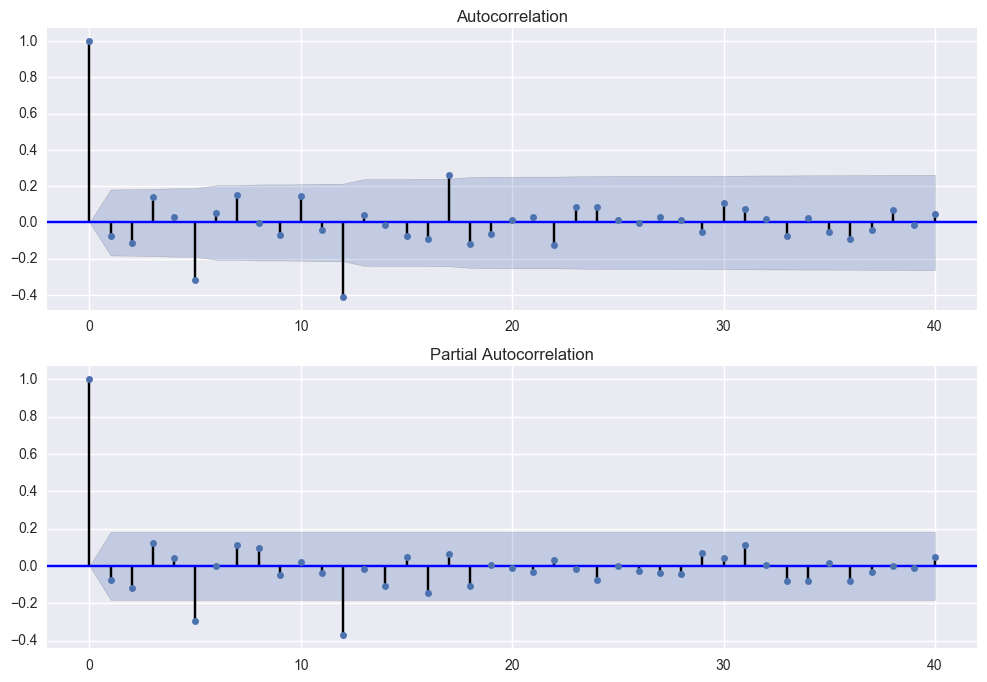

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [15]:
import statsmodels.api as sm 
mod = sm.tsa.statespace.SARIMAX(df.GSO_LF, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results = mod.fit()
print results.summary()

                                 Statespace Model Results                                 
Dep. Variable:                             GSO_LF   No. Observations:                  129
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -1053.570
Date:                            Thu, 22 Dec 2016   AIC                           2111.140
Time:                                    10:16:50   BIC                           2116.860
Sample:                                01-01-2006   HQIC                          2113.464
                                     - 09-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.0462      0.023     -2.042      0.041      -0.091      -0.002
sigma2      4.066e+06   4.44e+05   

In [16]:
mod = sm.tsa.statespace.SARIMAX(df.GSO_LF, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print results.summary()

                                 Statespace Model Results                                 
Dep. Variable:                             GSO_LF   No. Observations:                  129
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -1051.859
Date:                            Thu, 22 Dec 2016   AIC                           2109.718
Time:                                    10:17:37   BIC                           2118.297
Sample:                                01-01-2006   HQIC                          2113.204
                                     - 09-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3232      0.003   -126.047      0.000      -0.328      -0.318
ma.S.L12       0.2846      0.002   

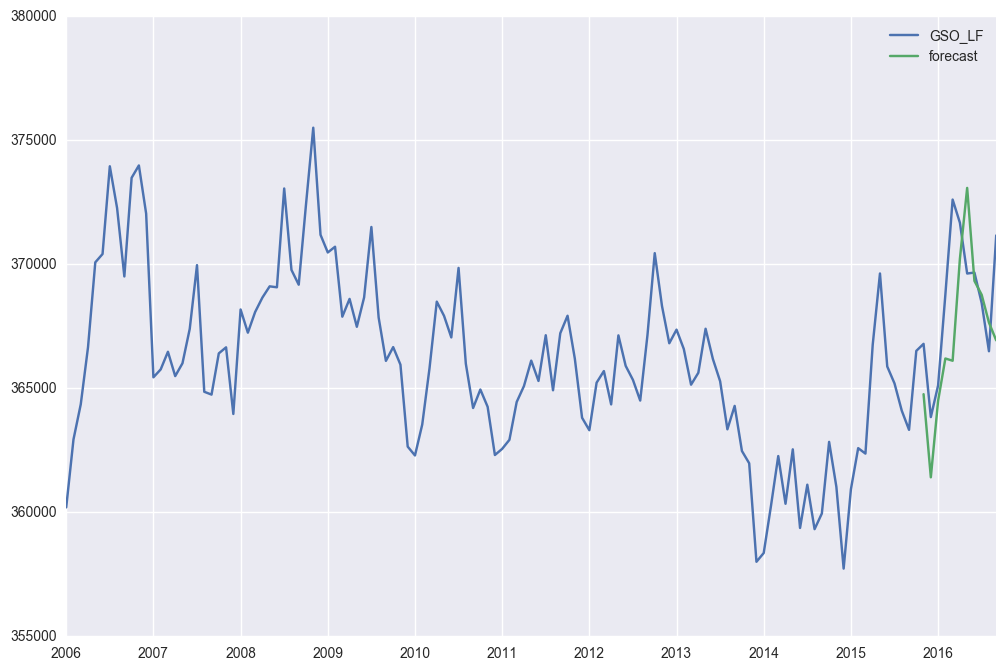

In [18]:
df['forecast'] = results.predict(start = 118, end= 130, dynamic= True)  
df[['GSO_LF', 'forecast']].plot(figsize=(12, 8)) 
#plt.savefig('ts_df_predict.png', bbox_inches='tight')

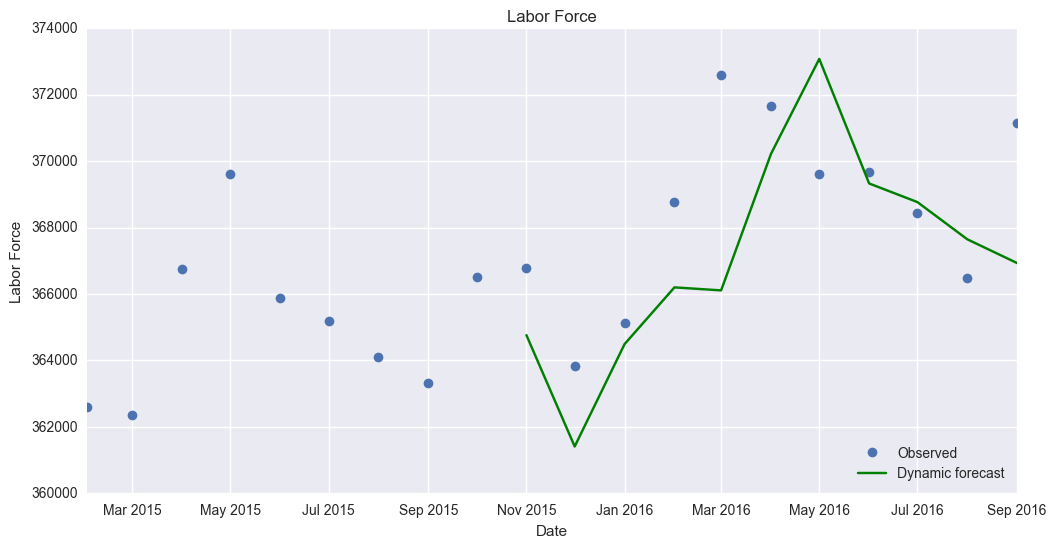

In [19]:
npredict =df.GSO_LF['2016'].shape[0]
fig, ax = plt.subplots(figsize=(12,6))
npre = 12
ax.set(title='Labor Force', xlabel='Date', ylabel='Labor Force')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'GSO_LF'], 'o', label='Observed')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'forecast'], 'g', label='Dynamic forecast')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')
#plt.savefig('ts_predict_compare.png', bbox_inches='tight')

In [59]:
start = datetime.datetime.strptime("2016-11-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,62)]
future = pd.DataFrame(index=date_list, columns= df.columns)

In [60]:
df1 = pd.concat([df, future])

In [61]:
df1

,GSO_LF,GSO_UR,CLT_LF,CLT_UR,RDU_LF,RDU_UR,Harrisburg_LF,Harrisburg_UR,USA_LF,USA_UR,first_difference,seasonal_difference,seasonal_first_difference,forecast
2006-01-01,360198.0,4.7,1014866.0,4.9,245718.0,3.8,276661.0,4.1,150214.0,4.7,NaN,NaN,NaN,NaN
2006-02-01,362938.0,5.0,1021495.0,5.2,247942.0,4.1,276445.0,4.1,150641.0,4.8,2740.0,NaN,NaN,NaN
2006-03-01,364353.0,4.5,1027071.0,4.7,249102.0,3.7,278255.0,3.8,150813.0,4.7,1415.0,NaN,NaN,NaN
2006-04-01,366655.0,4.5,1032285.0,4.7,248950.0,3.7,278101.0,3.5,150881.0,4.7,2302.0,NaN,NaN,NaN
2006-05-01,370078.0,4.7,1040587.0,4.9,251530.0,3.9,281095.0,3.8,151069.0,4.6,3423.0,NaN,NaN,NaN
2006-06-01,370414.0,5.1,1042765.0,5.3,254221.0,4.2,284704.0,4.0,151354.0,4.6,336.0,NaN,NaN,NaN
2006-07-01,373952.0,5.4,1049796.0,5.4,257485.0,4.4,287259.0,4.0,151377.0,4.7,3538.0,NaN,NaN,NaN
2006-08-01,372268.0,5.1,1054405.0,5.2,256076.0,4.2,287051.0,3.9,151716.0,4.7,-1684.0,NaN,NaN,NaN
2006-09-01,369509.0,4.7,1056308.0,4.8,255396.0,3.8,282479.0,3.4,151662.0,4.5,-2759.0,NaN,NaN,NaN
2006-10-01,373487.0,4.4,1065042.0,4.6,256627.0,3.7,281671.0,3.2,152041.0,4.4,3978.0,NaN,NaN,NaN


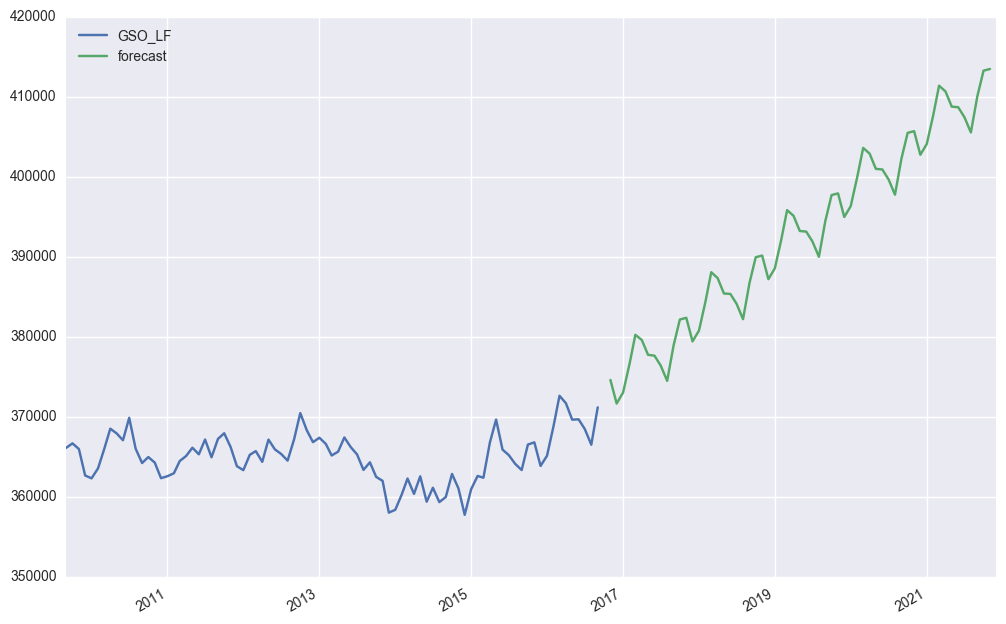

In [62]:
df1['forecast'] = results.predict(start = 129, end = 190, dynamic= True)  
df1[['GSO_LF', 'forecast']].ix[-427:].plot(figsize=(12, 8))
#plt.savefig('ts_predict_future.png', bbox_inches='tight')

In [58]:
df

,GSO_LF,GSO_UR,CLT_LF,CLT_UR,RDU_LF,RDU_UR,Harrisburg_LF,Harrisburg_UR,USA_LF,USA_UR,first_difference,seasonal_difference,seasonal_first_difference,forecast
2006-01-01,360198.0,4.7,1014866.0,4.9,245718.0,3.8,276661.0,4.1,150214.0,4.7,NaN,NaN,NaN,NaN
2006-02-01,362938.0,5.0,1021495.0,5.2,247942.0,4.1,276445.0,4.1,150641.0,4.8,2740.0,NaN,NaN,NaN
2006-03-01,364353.0,4.5,1027071.0,4.7,249102.0,3.7,278255.0,3.8,150813.0,4.7,1415.0,NaN,NaN,NaN
2006-04-01,366655.0,4.5,1032285.0,4.7,248950.0,3.7,278101.0,3.5,150881.0,4.7,2302.0,NaN,NaN,NaN
2006-05-01,370078.0,4.7,1040587.0,4.9,251530.0,3.9,281095.0,3.8,151069.0,4.6,3423.0,NaN,NaN,NaN
2006-06-01,370414.0,5.1,1042765.0,5.3,254221.0,4.2,284704.0,4.0,151354.0,4.6,336.0,NaN,NaN,NaN
2006-07-01,373952.0,5.4,1049796.0,5.4,257485.0,4.4,287259.0,4.0,151377.0,4.7,3538.0,NaN,NaN,NaN
2006-08-01,372268.0,5.1,1054405.0,5.2,256076.0,4.2,287051.0,3.9,151716.0,4.7,-1684.0,NaN,NaN,NaN
2006-09-01,369509.0,4.7,1056308.0,4.8,255396.0,3.8,282479.0,3.4,151662.0,4.5,-2759.0,NaN,NaN,NaN
2006-10-01,373487.0,4.4,1065042.0,4.6,256627.0,3.7,281671.0,3.2,152041.0,4.4,3978.0,NaN,NaN,NaN
